In [38]:
%matplotlib inline

from src.tables_and_figures import retrive_results, final_results_df

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [40]:
def make_plot(plot_df, figure_name=None):
    plot_df["Fairness"] = plot_df["test_fairness mean"]
    plot_df["Accuracy"] = plot_df["test_performance mean"]

    figure = plt.figure(figsize=(6, 6), dpi = 150) 
    with sns.axes_style("white"):
        sns.lineplot(
            data=plot_df,
            x="Accuracy",
            y="Fairness",
            hue="Models",
            markers=True,
            style="Models",
        )
    if figure_name is not None:
        figure.savefig(Path(r"plots") / figure_name, dpi=960, bbox_inches="tight") 

# Moji

In [3]:
Moji_results = retrive_results("Moji")
Moji_results["FairBatch"] = Moji_results["OldFairBatch"]
Moji_results["Augmented Adv"] = Moji_results["GatedAdv"]
Moji_results["Augmented DAdv"] = Moji_results["GatedDAdv"]

In [4]:
Moji_results.keys()

dict_keys(['Adv', 'BTEO', 'BTFairBatch', 'BTGatedAdv', 'DAdv', 'DelayedCLS_Adv', 'FairBatch', 'FairSCL', 'GatedAdv', 'GatedBTEO', 'GatedDAdv', 'GDEO', 'GDMean', 'INLP', 'OldFairBatch', 'Vanilla', 'Augmented Adv', 'Augmented DAdv'])

In [29]:
from src.utils import tradeoff_plot

In [21]:
DelayedCLS_Adv_df = Moji_results["DelayedCLS_Adv"].reset_index()

In [23]:
Moji_results["DelayedCLS_Adv_2"] = DelayedCLS_Adv_df[DelayedCLS_Adv_df["classification_head_update_frequency"]==2].set_index(["adv_lambda"])
Moji_results["DelayedCLS_Adv_4"] = DelayedCLS_Adv_df[DelayedCLS_Adv_df["classification_head_update_frequency"]==4].set_index(["adv_lambda"])
Moji_results["DelayedCLS_Adv_10"] = DelayedCLS_Adv_df[DelayedCLS_Adv_df["classification_head_update_frequency"]==10].set_index(["adv_lambda"])
Moji_results["DelayedCLS_Adv_100"] = DelayedCLS_Adv_df[DelayedCLS_Adv_df["classification_head_update_frequency"]==100].set_index(["adv_lambda"])

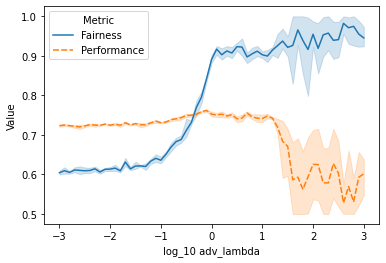

In [11]:
tradeoff_plot(DelayedCLS_Adv_df[DelayedCLS_Adv_df["classification_head_update_frequency"]==2], "adv_lambda")

In [15]:
DelayedCLS_Adv_df["classification_head_update_frequency"] = DelayedCLS_Adv_df["classification_head_update_frequency"].astype(str)

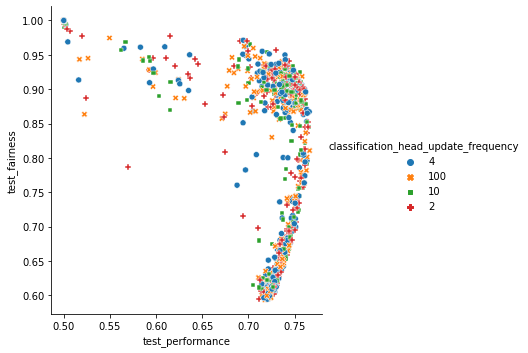

In [17]:
sns.relplot(
    data=DelayedCLS_Adv_df,
    x="test_performance",
    y="test_fairness",
    style="classification_head_update_frequency",
    hue="classification_head_update_frequency",
) 

In [9]:
Moji_results["DelayedCLS_Adv"]

epoch  dev_fairness  \
classification_head_update_frequency adv_lambda                         
4                                    1000.000000      6      0.894613   
100                                  0.316228         2      0.719319   
10                                   0.158489         7      0.695762   
2                                    0.031623         9      0.634090   
10                                   0.001000         7      0.616373   
...                                                 ...           ...   
4                                    199.526231       0      1.000000   
                                     1.000000         1      0.911942   
                                     31.622777        4      0.945957   
10                                   10.000000        7      0.908746   
100                                  0.079433         7      0.669553   

                                                  dev_performance   dev_DTO  \
classification_head_update_frequency adv_lambda                               
4                                    1000.000000         0.701750  0.112211   
100                                  0.316228            0.741625  0.019324   
10                                   0.158489            0.738750  0.000000   
2                                    0.031623            0.729125  0.008469   
10                                   0.001000            0.720500  0.004834   
...                                                           ...       ...   
4                                    199.526231          0.500000  0.057715   
                                     1.000000            0.750125  0.011367   
                                     31.622777           0.706625  0.081003   
10                                   10.000000           0.733250  0.055087   
100                                  0.079433            0.734750  0.000000   

                                                  test_fairness  \
classification_head_update_frequency adv_lambda                   
4                                    1000.000000       0.868214   
100                                  0.316228          0.700678   
10                                   0.158489          0.673968   
2                                    0.031623          0.621476   
10                                   0.001000          0.602914   
...                                                         ...   
4                                    199.526231        1.000000   
                                     1.000000          0.896068   
                                     31.622777         0.936602   
10                                   10.000000         0.919455   
100                                  0.079433          0.653212   

                                                  test_performance  test_DTO  \
classification_head_update_frequency adv_lambda                                
4                                    1000.000000          0.705176  0.135917   
100                                  0.316228             0.743936  0.012226   
10                                   0.158489             0.742811  0.000000   
2                                    0.031623             0.729557  0.001403   
10                                   0.001000             0.721430  0.000000   
...                                                            ...       ...   
4                                    199.526231           0.500000  0.059501   
                                     1.000000             0.761940  0.007902   
                                     31.622777            0.710303  0.085213   
10                                   10.000000            0.744561  0.033256   
100                                  0.079433             0.736684  0.000000   

                                                                                            opt_dir  
classification_head_update_frequency adv_lambda          

In [5]:
Moji_main_results = final_results_df(
    results_dict = Moji_results,
    model_order = ["Vanilla", "Adv", "DAdv", "INLP", "FairBatch", "BTEO", "GatedBTEO", "Augmented Adv", "Augmented DAdv", "GDEO", "GDMean", "FairSCL"],
    pareto = False,
    pareto_selection = "test",
    selection_criterion = "DTO",
    return_dev = True,
    # Fairness_threshold=0.95,
    # return_conf=True,
    # save_conf_dir=r"D:\Project\Fair_NLP_Classification\analysis\reproduce\Moji"
    )
Moji_main_results

,Models,test_performance mean,test_performance std,test_fairness mean,test_fairness std,dev_performance mean,dev_performance std,dev_fairness mean,dev_fairness std,DTO
0,Vanilla,0.722981,0.004576,0.611870,0.014356,0.726650,0.003673,0.632302,0.013370,0.476849
1,Adv,0.756414,0.007271,0.893286,0.005623,0.747425,0.004549,0.912125,0.008507,0.265936
2,DAdv,0.755464,0.004076,0.904023,0.011218,0.748550,0.002405,0.915601,0.005007,0.262697
3,INLP,0.733433,NaN,0.855982,NaN,0.727625,NaN,0.859686,NaN,0.302983
4,FairBatch,0.750638,0.006012,0.905537,0.005046,0.744525,0.004995,0.917734,0.004761,0.266655
5,BTEO,0.753927,0.001433,0.877469,0.003756,0.746325,0.000998,0.896874,0.005401,0.274892
6,GatedBTEO,0.762106,0.002592,0.900764,0.014701,0.759775,0.003798,0.909445,0.006631,0.257762
7,Augmented Adv,0.753113,0.005196,0.890065,0.013302,0.748975,0.003805,0.910838,0.010314,0.270257
8,Augmented DAdv,0.750163,0.006945,0.908679,0.021678,0.745600,0.004828,0.928670,0.022488,0.266004
9,GDEO,0.752763,0.004999,0.892255,0.007860,0.749350,0.003494,0.912672,0.002766,0.269694


In [6]:
print(Moji_main_results.to_latex(index=False))

\begin{tabular}{lrrrrrrrrr}
\toprule
        Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &  dev\_performance mean &  dev\_performance std &  dev\_fairness mean &  dev\_fairness std &      DTO \\
\midrule
       Vanilla &               0.722981 &              0.004576 &            0.611870 &           0.014356 &              0.726650 &             0.003673 &           0.632302 &          0.013370 & 0.476849 \\
           Adv &               0.756414 &              0.007271 &            0.893286 &           0.005623 &              0.747425 &             0.004549 &           0.912125 &          0.008507 & 0.265936 \\
          DAdv &               0.755464 &              0.004076 &            0.904023 &           0.011218 &              0.748550 &             0.002405 &           0.915601 &          0.005007 & 0.262697 \\
          INLP &               0.733433 &                   NaN &            0.855982 &                NaN &  

In [7]:
tmp_df = Moji_main_results[["Models", "test_performance mean", "test_fairness mean"]].copy()
tmp_df["test_GAP mean"] = 1-tmp_df["test_fairness mean"].copy()
tmp_df[["Models", "test_performance mean", "test_GAP mean"]]

,Models,test_performance mean,test_GAP mean
0,Vanilla,0.722981,0.388130
1,Adv,0.756414,0.106714
2,DAdv,0.755464,0.095977
3,INLP,0.733433,0.144018
4,FairBatch,0.750638,0.094463
5,BTEO,0.753927,0.122531
6,GatedBTEO,0.762106,0.099236
7,Augmented Adv,0.753113,0.109935
8,Augmented DAdv,0.750163,0.091321
9,GDEO,0.752763,0.107745


In [6]:
Moji_results.keys()

dict_keys(['Adv', 'BTEO', 'BTFairBatch', 'BTGatedAdv', 'DAdv', 'DelayedCLS_Adv', 'FairBatch', 'FairSCL', 'GatedAdv', 'GatedBTEO', 'GatedDAdv', 'GDEO', 'GDMean', 'INLP', 'OldFairBatch', 'Vanilla', 'Augmented Adv', 'Augmented DAdv'])

In [8]:
Moji_main_results = final_results_df(
    results_dict = Moji_results,
    model_order = ["Vanilla", "Adv", 'DAdv'],
    pareto = False,
    pareto_selection = "test",
    selection_criterion = "DTO",
    return_dev = True,
    # Fairness_threshold=0.95,
    # return_conf=True,
    # save_conf_dir=r"D:\Project\Fair_NLP_Classification\analysis\reproduce\Moji"
    )
Moji_main_results

,Models,test_performance mean,test_performance std,test_fairness mean,test_fairness std,dev_performance mean,dev_performance std,dev_fairness mean,dev_fairness std,DTO
0,Vanilla,0.722981,0.004576,0.611870,0.014356,0.726650,0.003673,0.632302,0.013370,0.476849
1,Adv,0.756414,0.007271,0.893286,0.005623,0.747425,0.004549,0.912125,0.008507,0.265936
2,DAdv,0.755464,0.004076,0.904023,0.011218,0.748550,0.002405,0.915601,0.005007,0.262697


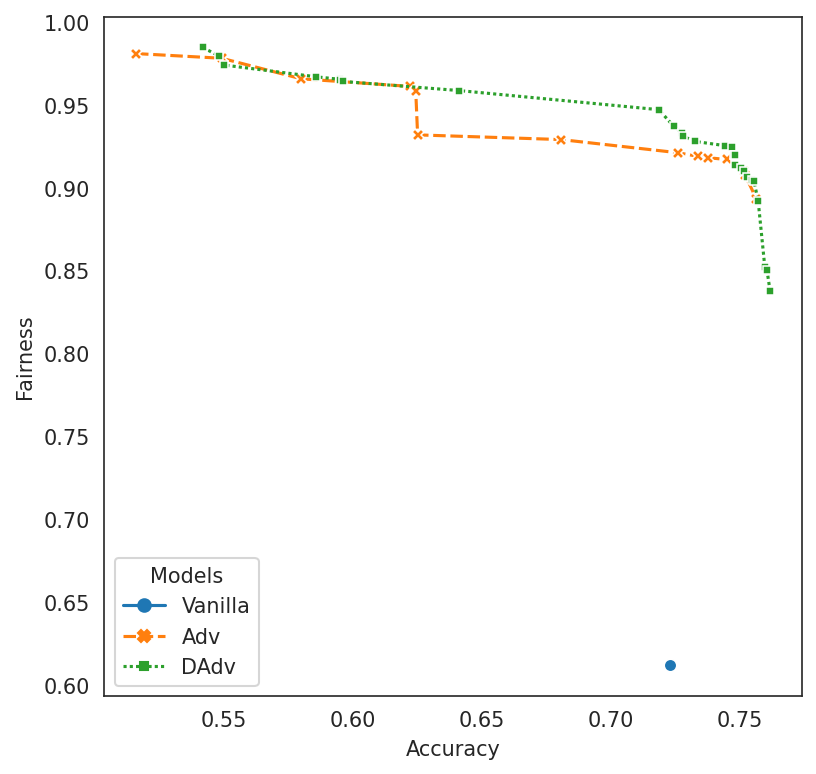

In [11]:
Moji_plot_df = final_results_df(
    results_dict = Moji_results,
    # model_order = [
    #     "Vanilla", 
    #     "Adv", "DAdv", 
    #     "INLP", 
    #     "FairBatch", 
    #     "BTEO", "GatedBTEO", 
    #     "Augmented Adv", "Augmented DAdv", 
    #     "GDEO", "GDMean", 
    #     "FairSCL",
    #     ],
    model_order = ["Vanilla", "Adv", 'DAdv'],
    pareto = True,
    # pareto = False,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True,
    # Performance_threshold=0.72
    # num_trail=20,
    )
# Moji_plot_df["test_fairness mean"] = (1-Moji_plot_df["test_fairness mean"])
make_plot(Moji_plot_df)

# Bios Intersectional Groups

In [9]:
Bios_both_results = retrive_results("Bios_both")

In [10]:
Bios_both_results["FairBatch"] = Bios_both_results["OldFairBatch"]
Bios_both_results["GatedAdv"] = pd.concat([Bios_both_results["GAdv"], Bios_both_results["BTGAdv"]])
Bios_both_results["GatedDAdv"] = pd.concat([Bios_both_results["GDAdv"], Bios_both_results["BTGDAdv"]])

In [11]:
Bios_both_main_results = final_results_df(
    results_dict = Bios_both_results,
    model_order = ["Vanilla", "Adv", "DAdv", "INLP", "FairBatch", "GatedAdv", "GatedDAdv"],
    pareto = True,
    pareto_selection = "test",
    selection_criterion = "DTO",
    return_dev = True
    )
Bios_both_main_results

,Models,test_performance mean,test_performance std,test_fairness mean,test_fairness std,dev_performance mean,dev_performance std,dev_fairness mean,dev_fairness std,DTO
0,Vanilla,0.815181,0.002435,0.555411,0.029533,0.807466,0.002962,0.540741,0.011691,0.481475
1,Adv,0.646016,0.045083,0.836838,0.011231,0.638627,0.043760,0.799317,0.030209,0.389777
2,DAdv,0.680895,0.054854,0.794713,0.067696,0.675794,0.054582,0.754632,0.066709,0.379435
3,INLP,0.813543,NaN,0.624426,NaN,0.803395,NaN,0.543710,NaN,0.419311
4,FairBatch,0.812416,0.001241,0.623468,0.018890,0.805002,0.001388,0.578378,0.014323,0.420671
5,GatedAdv,0.698492,0.035838,0.792417,0.059961,0.692470,0.036704,0.744349,0.035828,0.366057
6,GatedDAdv,0.699038,0.019692,0.797145,0.047948,0.693967,0.020421,0.741946,0.034637,0.362944


In [12]:
Bios_both = final_results_df(
    results_dict = Bios_both_results,
    model_order = ["Vanilla", "Adv", "DAdv", "INLP", "FairBatch", "GatedAdv", "GatedDAdv"],
    pareto = True,
    pareto_selection = "test",
    selection_criterion = "DTO",
    return_dev = False,
    Fairness_threshold=0.5,
    Performance_threshold=0.7,
    )

In [13]:
print(Bios_both.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
   Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &      DTO \\
\midrule
  Vanilla &               0.815181 &              0.002435 &            0.555411 &           0.029533 & 0.481475 \\
      Adv &               0.715314 &              0.056697 &            0.673155 &           0.053544 & 0.433444 \\
     DAdv &               0.734351 &              0.037638 &            0.687555 &           0.049055 & 0.410111 \\
     INLP &               0.813543 &                   NaN &            0.624426 &                NaN & 0.419311 \\
FairBatch &               0.812416 &              0.001241 &            0.623468 &           0.018890 & 0.420671 \\
 GatedAdv &               0.708736 &              0.050729 &            0.736469 &           0.079803 & 0.392789 \\
GatedDAdv &               0.707055 &              0.041894 &            0.771136 &           0.035268 & 0.371746 \\
\bottomrule
\end{tabular}


In [14]:
Bios_both_results["Augmented Adv"] = Bios_both_results["GatedAdv"]
Bios_both_results["Augmented DAdv"] = Bios_both_results["GatedDAdv"]

In [15]:
Bios_both_plot_df = final_results_df(
    results_dict = Bios_both_results,
    model_order = ["Vanilla", "Adv", "DAdv", "INLP", "FairBatch", "Augmented Adv", "Augmented DAdv"],
    pareto = True,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True
    )

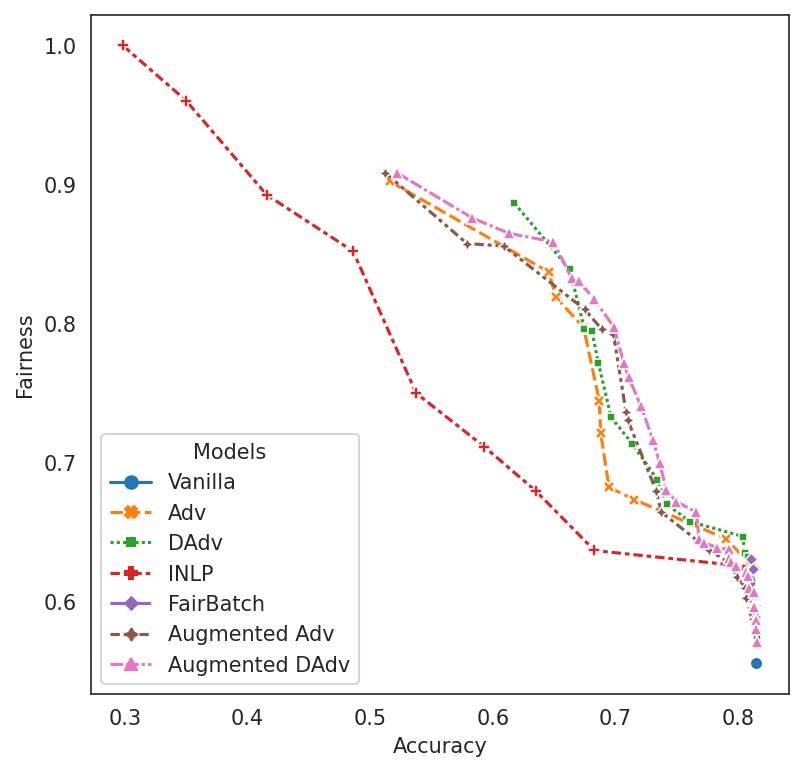

In [16]:
make_plot(Bios_both_plot_df)

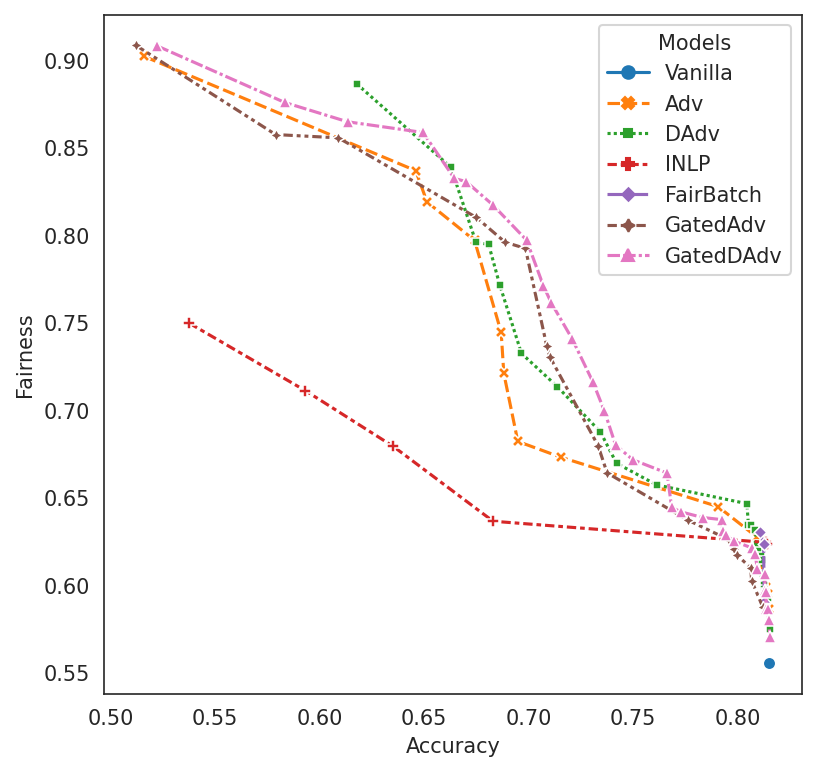

In [17]:
Bios_both_plot_df2 = final_results_df(
    results_dict = Bios_both_results,
    model_order = ["Vanilla", "Adv", "DAdv", "INLP", "FairBatch", "GatedAdv", "GatedDAdv"],
    pareto = True,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True,
    Fairness_threshold=0.5,
    Performance_threshold=0.5,
    )

make_plot(Bios_both_plot_df2)

# Bios Gender

In [12]:
Bios_gender_results = retrive_results("Bios_gender")

Bios_gender_results["FairBatch"] = Bios_gender_results["OldFairBatch"]
Bios_gender_results["Augmented Adv"] = pd.concat([Bios_gender_results["GAdv"], Bios_gender_results["BTGAdv"]])
Bios_gender_results["Augmented DAdv"] = pd.concat([Bios_gender_results["GDAdv"], Bios_gender_results["BTGDAdv"]])

In [33]:
Bios_gender_results.keys()

dict_keys(['Adv', 'BTEO', 'BTFairBatch', 'BTGAdv', 'BTGDAdv', 'DAdv', 'FairBatch', 'FairSCL', 'GAdv', 'GatedBTEO', 'GDAdv', 'GDEO', 'GDMean', 'INLP', 'OldFairBatch', 'Vanilla', 'Augmented Adv', 'Augmented DAdv'])

In [38]:
Bios_gender_results["GDEO"]

,epoch,dev_fairness,dev_performance,dev_DTO,test_fairness,test_performance,test_DTO,opt_dir
DyBTalpha,,,,,,,,
0.001778,8,0.880611,0.820771,0.001473,0.871154,0.823416,0.000833,/data/cephfs/punim0478/xudongh1/experimental_r...
0.014125,4,0.914531,0.802785,0.015005,0.921416,0.806488,0.010759,/data/cephfs/punim0478/xudongh1/experimental_r...
0.014125,16,0.910311,0.801423,0.015202,0.898125,0.802138,0.021465,/data/cephfs/punim0478/xudongh1/experimental_r...
0.001585,0,0.875468,0.821023,0.001166,0.863463,0.823578,0.009410,/data/cephfs/punim0478/xudongh1/experimental_r...
0.100000,17,0.974083,0.687831,0.007449,0.973082,0.685300,0.010046,/data/cephfs/punim0478/xudongh1/experimental_r...
...,...,...,...,...,...,...,...,...
0.005623,18,0.902017,0.819459,0.001322,0.881040,0.820812,0.024292,/data/cephfs/punim0478/xudongh1/experimental_r...
0.003981,15,0.880674,0.818299,0.005216,0.868637,0.821609,0.006063,/data/cephfs/punim0478/xudongh1/experimental_r...
0.070795,1,0.958956,0.722466,0.019352,0.952466,0.721931,0.029682,/data/cephfs/punim0478/xudongh1/experimental_r...


In [ ]:
tradeoff_plot(Bios_gender_results["Adv"], "DyBTalpha")

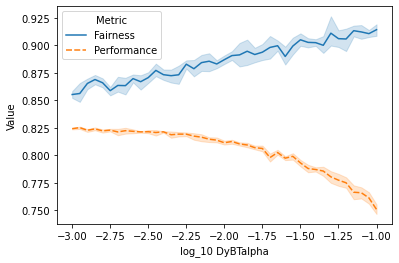

In [40]:
tradeoff_plot(Bios_gender_results["GDMean"], "DyBTalpha")

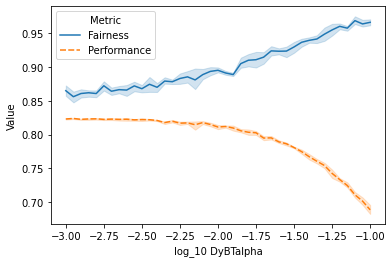

In [39]:
tradeoff_plot(Bios_gender_results["GDEO"], "DyBTalpha")

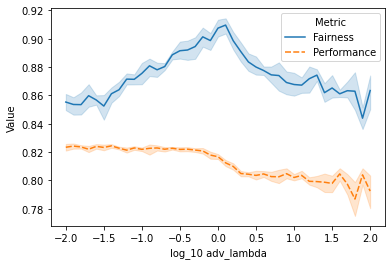

In [37]:
tradeoff_plot(Bios_gender_results["Adv"], "adv_lambda")

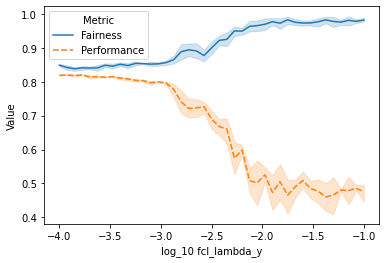

In [30]:
tradeoff_plot(Bios_gender_results["FairSCL"], "fcl_lambda_y", figure_name="Bios_FairSCL_hypertune")


In [20]:
Bios_gender_results["GDEO"]

,epoch,dev_fairness,dev_performance,dev_DTO,test_fairness,test_performance,test_DTO,opt_dir
DyBTalpha,,,,,,,,
0.001778,8,0.880611,0.820771,0.001473,0.871154,0.823416,0.000833,/data/cephfs/punim0478/xudongh1/experimental_r...
0.014125,4,0.914531,0.802785,0.015005,0.921416,0.806488,0.010759,/data/cephfs/punim0478/xudongh1/experimental_r...
0.014125,16,0.910311,0.801423,0.015202,0.898125,0.802138,0.021465,/data/cephfs/punim0478/xudongh1/experimental_r...
0.001585,0,0.875468,0.821023,0.001166,0.863463,0.823578,0.009410,/data/cephfs/punim0478/xudongh1/experimental_r...
0.100000,17,0.974083,0.687831,0.007449,0.973082,0.685300,0.010046,/data/cephfs/punim0478/xudongh1/experimental_r...
...,...,...,...,...,...,...,...,...
0.005623,18,0.902017,0.819459,0.001322,0.881040,0.820812,0.024292,/data/cephfs/punim0478/xudongh1/experimental_r...
0.003981,15,0.880674,0.818299,0.005216,0.868637,0.821609,0.006063,/data/cephfs/punim0478/xudongh1/experimental_r...
0.070795,1,0.958956,0.722466,0.019352,0.952466,0.721931,0.029682,/data/cephfs/punim0478/xudongh1/experimental_r...


In [21]:
Bios_gender_main_results = final_results_df(
    results_dict = Bios_gender_results,
    # model_order = ["Vanilla", "Adv", "DAdv", "INLP", "FairBatch", "BTEO", "GatedBTEO", "GatedAdv", "GatedDAdv"],
    model_order =["Vanilla", "Adv", "DAdv", "INLP", "FairBatch", "BTEO", "GatedBTEO", "Augmented Adv", "Augmented DAdv", "GDEO", "GDMean", "FairSCL"],
    pareto = True,
    pareto_selection = "test",
    selection_criterion = "DTO",
    # return_dev = True,
    # save_conf_dir = r"D:\Project\Fair_NLP_Classification\analysis\reproduce\Bios_gender"
    )
Bios_gender_main_results

,Models,test_performance mean,test_performance std,test_fairness mean,test_fairness std,dev_performance mean,dev_performance std,dev_fairness mean,dev_fairness std,DTO
0,Vanilla,0.822512,0.002410,0.851071,0.008095,0.819908,0.002125,0.863145,0.006457,0.231694
1,Adv,0.816637,0.002187,0.907356,0.007686,0.814308,0.001234,0.909428,0.008285,0.205438
2,DAdv,0.818480,0.001898,0.906376,0.004832,0.815252,0.001580,0.910746,0.006586,0.204242
3,INLP,0.823032,NaN,0.886249,NaN,0.820670,NaN,0.883876,NaN,0.210373
4,FairBatch,0.822382,0.001280,0.894995,0.012474,0.819868,0.001111,0.906735,0.001468,0.206335
5,BTEO,0.838326,0.002492,0.905370,0.009064,0.837228,0.002927,0.901765,0.009754,0.187332
6,GatedBTEO,0.836682,0.002266,0.904041,0.009154,0.833613,0.002738,0.894495,0.004687,0.189422
7,Augmented Adv,0.823037,0.002191,0.883569,0.008850,0.820226,0.002073,0.888371,0.007412,0.211830
8,Augmented DAdv,0.819136,0.003358,0.889603,0.005943,0.816541,0.003499,0.898678,0.007902,0.211894
9,GDEO,0.817773,0.002688,0.888683,0.009449,0.815024,0.003022,0.898779,0.010683,0.213537


In [22]:
tmp_df = Bios_gender_main_results[["Models", "test_performance mean", "test_fairness mean"]].copy()
tmp_df["test_GAP mean"] = 1-tmp_df["test_fairness mean"].copy()
tmp_df[["Models", "test_performance mean", "test_GAP mean"]]

,Models,test_performance mean,test_GAP mean
0,Vanilla,0.822512,0.148929
1,Adv,0.816637,0.092644
2,DAdv,0.818480,0.093624
3,INLP,0.823032,0.113751
4,FairBatch,0.822382,0.105005
5,BTEO,0.838326,0.094630
6,GatedBTEO,0.836682,0.095959
7,Augmented Adv,0.823037,0.116431
8,Augmented DAdv,0.819136,0.110397
9,GDEO,0.817773,0.111317


In [48]:
import matplotlib.lines as lines

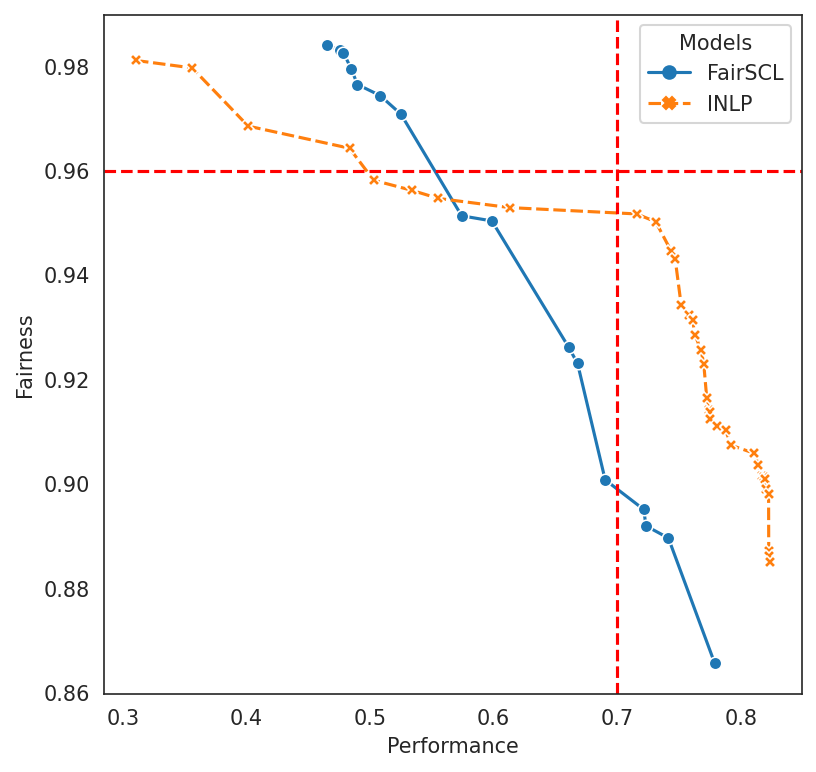

In [103]:
Bios_gender_plot_df = final_results_df(
    results_dict = Bios_gender_results,
    # model_order = ["Vanilla", "Adv", "DAdv", "INLP", "FairBatch", "BTEO", "GatedBTEO", "GatedAdv", "GatedDAdv"],
    # model_order = ["Vanilla", "Adv", "DAdv", "INLP", "FairBatch", "BTEO", "GatedBTEO", "Augmented Adv", "Augmented DAdv", "GDEO", "GDMean", "FairSCL"],
    model_order = ["FairSCL", "INLP"],
    pareto = True,
    # pareto = False,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True,
    Fairness_threshold=0.87,
    # Performance_threshold=0.86,
    # num_trail=1
    )

def _make_plot(plot_df, figure_name=None):
    plot_df["Fairness"] = plot_df["test_fairness mean"]
    plot_df["Performance"] = plot_df["test_performance mean"]

    figure = plt.figure(figsize=(6, 6), dpi = 150) 
    with sns.axes_style("white"):
        sns.lineplot(
            data=plot_df,
            x="Performance",
            y="Fairness",
            hue="Models",
            markers=True,
            style="Models",
        )

    # max_fairness = max(plot_df["Fairness"])
    # max_performance = max(plot_df["Performance"])
    # plt.axvline(max_performance, ls="--", color='g') # vertical
    # plt.axhline(max_fairness, ls="--", color='g') # horizontal
    # plt.plot(max_performance, max_fairness, "go")

    # plt.plot([0.525, max_performance], [0.971, max_fairness], 'g:')
    # plt.plot([0.515, max_performance], [0.965, max_fairness], 'g:')

    # plt.text(0.525, 0.971, "A", c="k",horizontalalignment='center',verticalalignment='bottom', fontsize=12)
    # plt.text(0.515, 0.965, "B", c="k",horizontalalignment='center',verticalalignment='bottom', fontsize=12)
    # plt.text(max_performance, max_fairness, "Utopia", c="k",horizontalalignment='right',verticalalignment='bottom', fontsize=12)

    # plt.text((0.525+max_performance)/2, (0.971+max_fairness)/2, "DTO$_A$", c="k",horizontalalignment='right',verticalalignment='bottom', fontsize=12)
    # plt.text((0.515+max_performance)/2, (0.965+max_fairness)/2, "DTO$_B$", c="k",horizontalalignment='left',verticalalignment='top', fontsize=12)

    plt.axvline(0.7, ls="--", color='r') # vertical
    plt.axhline(0.96, ls="--", color='r') # horizontal

    if figure_name is not None:
        figure.savefig(Path(r"plots") / figure_name, dpi=960, bbox_inches="tight") 

# Moji_plot_df["test_fairness mean"] = (1-Moji_plot_df["test_fairness mean"])
_make_plot(Bios_gender_plot_df, "bios_tradeoff_FairSCL_vs_INLP_pareto")
# _make_plot(Bios_gender_plot_df, "bios_tradeoff_FairSCL_vs_INLP")
# _make_plot(Bios_gender_plot_df)